<a href="https://colab.research.google.com/github/OMARHASSAN70/Wav2Lip-OmarAljilani-/blob/main/Omar_Aljilani_Image_to_Talking_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="direction: rtl; text-align: center;">
  <b><span style="font-size: large;">تحويل الصورة لفيديو ناطق - عمر الجيلاني</span></b>
</p>


---

**مشروع تحويل الصورة لفيديو ناطق**

---






آخر تحديث 11 يوليو 2025

---

---

In [3]:
#@title ⬇️ الخطوة 1: تحميل الملفات وتثبيت المتطلبات
#@markdown **📦 يتم الآن تحميل المشروع والنماذج المطلوبة وتثبيت المكتبات اللازمة تلقائيًا... الرجاء الانتظار**

# تحميل المشروع من GitHub
!git clone https://github.com/splendormagic/I2TV_BahaaMahmoudTUT.git I2TV_OmarAljilani

# الانتقال إلى مجلد المشروع الجديد
%cd /content/I2TV_OmarAljilani

# تحميل النماذج المدربة
!mkdir -p checkpoints
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip.pth' -O 'checkpoints/wav2lip.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip_gan.pth' -O 'checkpoints/wav2lip_gan.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/resnet50.pth' -O 'checkpoints/resnet50.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/mobilenet.pth' -O 'checkpoints/mobilenet.pth'

# تثبيت المكتبات المطلوبة
!pip install ffmpeg-python librosa==0.9.1 opencv-python
!pip install git+https://github.com/elliottzheng/batch-face.git@master
!pip install https://raw.githubusercontent.com/AwaleSajil/ghc/master/ghc-1.0-py3-none-any.whl

# استيراد مكتبات التسجيل الصوتي
from IPython.display import HTML, display
from google.colab.output import eval_js
from base64 import b64decode
import ffmpeg
import io
from scipy.io.wavfile import read as wav_read

# إعداد كود HTML لتسجيل الصوت
AUDIO_HTML = """
<script>
document.title = "عمر الجيلاني - تحويل صورة إلى فيديو ناطق";

var my_div = document.createElement("DIV");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("🎙️ ابدأ التسجيل");

my_btn.appendChild(t);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
};

recordButton.innerText = "🎙️ جاري التسجيل... اضغط للإيقاف";
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "✅ تم حفظ التسجيل";
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  resolve(base64data.toString())
});
}
});
</script>
"""

# دالة تسجيل الصوت بصيغة WAV
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (
      ffmpeg
      .input('pipe:0')
      .output('pipe:1', format='wav')
      .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  riff = output[:4] + bytes(b) + output[8:]
  sr, audio = wav_read(io.BytesIO(riff))
  return audio, sr


Cloning into 'I2TV_OmarAljilani'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 97 (delta 19), reused 88 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (97/97), 60.47 KiB | 520.00 KiB/s, done.
Resolving deltas: 100% (19/19), done.
[Errno 2] No such file or directory: '/content/I2TV_OmarAljilani'
/content/I2TV_BahaaMahmoudTUT
--2025-07-11 17:46:06--  https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip.pth
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/615543729/e18ec62e-10ae-4c65-9862-1c7a0fafe228?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250711%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250711T174606Z&X-Amz

  if event.key is 'enter':



/content


Saving MOHAMEAD.jpg to MOHAMEAD.jpg
🎞️ أبعاد الفيديو: (512, 768)
✅ لا حاجة لتقليص الأبعاد.


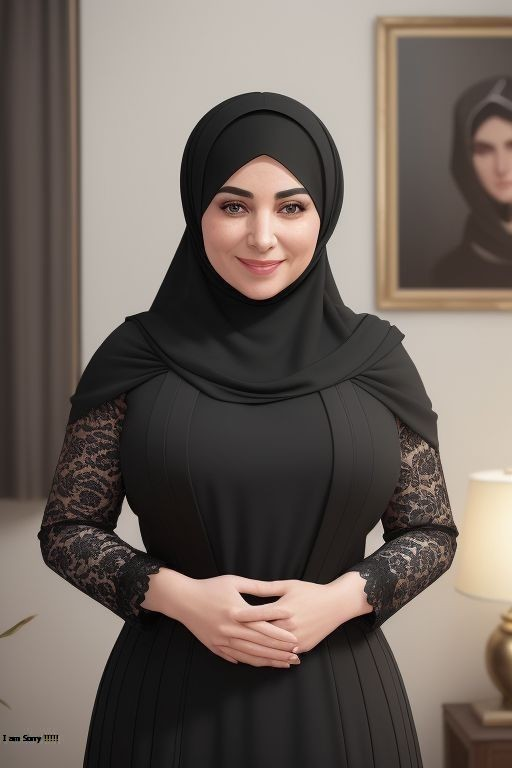

In [7]:
#@title 📷 الخطوة 2 : رفع الصورة
#@markdown * يجب أن تكون الصورة للنصف الأعلى من الجسم
#@markdown * أن تكون مواجهة للكاميرا وملامح الوجه واضحة

import os
import cv2
from google.colab import files
from IPython.display import Image, display, HTML
from base64 import b64encode
import moviepy.editor as mp

%cd /content

# إنشاء مجلد للصور إن لم يكن موجوداً
if not os.path.exists('images'):
  os.makedirs('images')

# حذف الصورة السابقة إن وُجدت
if os.path.isfile('/content/images/input_img.jpg'):
    os.remove('/content/images/input_img.jpg')

# رفع الصورة من الجهاز
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, '/content/images/input_img.jpg')

# إنشاء مجلد للفيديو إن لم يكن موجوداً
if not os.path.exists('video'):
  os.makedirs('video')

# حذف الفيديو السابق إن وُجد
if os.path.isfile('/content/video/input_vid.mp4'):
    os.remove('/content/video/input_vid.mp4')

# تحويل الصورة إلى فيديو
def images_to_video(image_folder, output_video, image_duration):
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    if not images:
        raise Exception("❌ لم يتم العثور على صورة داخل المجلد.")
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, _ = frame.shape

    fps = 24
    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

    for image in images:
        img = cv2.imread(os.path.join(image_folder, image))
        for _ in range(int(fps * image_duration)):
            video_writer.write(img)

    video_writer.release()

# تنفيذ التحويل
image_folder = "/content/images"
output_video = "/content/video/input_vid.mp4"
image_duration = 1  # ثانية واحدة
images_to_video(image_folder, output_video, image_duration)

# التحقق من خصائص الفيديو
def get_video_resolution(video_path):
    video = cv2.VideoCapture(video_path)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return (width, height)

PATH_TO_YOUR_VIDEO = '/content/video/input_vid.mp4'
video_duration = mp.VideoFileClip(PATH_TO_YOUR_VIDEO).duration

if video_duration > 60:
    print("⚠️ الفيديو أطول من 60 ثانية. يرجى رفع صورة أو فيديو أقصر.")
    raise SystemExit(0)

video_resolution = get_video_resolution(PATH_TO_YOUR_VIDEO)
print(f"🎞️ أبعاد الفيديو: {video_resolution}")

# تقليص الأبعاد إن لزم
if video_resolution[0] >= 1920 or video_resolution[1] >= 1080:
    print("📐 يتم الآن تقليص الفيديو إلى 720p...")
    os.system(f"ffmpeg -i {PATH_TO_YOUR_VIDEO} -vf scale=1280:720 /content/video/input_vid.mp4")
    PATH_TO_YOUR_VIDEO = "/content/video/input_vid.mp4"
    print("✅ تم تقليص حجم الفيديو.")
else:
    print("✅ لا حاجة لتقليص الأبعاد.")

# عرض الصورة للتأكيد
image_filename = '/content/images/input_img.jpg'
display(Image(filename=image_filename))


---

In [9]:
#@title 🎙️ الخطوة 3 : رفع الملف الصوتي
#@markdown * يفضّل أن يكون الصوت واضح وخالٍ من المؤثرات أو الموسيقى الخلفية.

import os
from google.colab import files
from IPython.display import Audio, display
import librosa
import soundfile as sf

# إنشاء مجلد الصوت
if not os.path.exists('/content/audio'):
  os.makedirs('/content/audio')

# حذف الصوت السابق
if os.path.isfile('/content/audio/input_audio.wav'):
    os.remove('/content/audio/input_audio.wav')

# رفع الملف الصوتي
uploaded = files.upload()

# التعامل مع أول ملف تم رفعه
if uploaded:
    file_name = list(uploaded.keys())[0]

    # تحميل الملف وتأكيد المسار
    audio_path = f"/content/audio/input_audio.wav"

    # تحويل الصوت إلى WAV بشكل صحيح
    audio, sr = librosa.load(file_name, sr=None)
    sf.write(audio_path, audio, sr, format='wav')

    print(f"✅ تم حفظ الملف باسم: {audio_path}")
else:
    print("❌ لم يتم رفع أي ملف صوتي.")

# عرض مشغّل الصوت
if os.path.isfile('/content/audio/input_audio.wav'):
    display(Audio('/content/audio/input_audio.wav'))
else:
    print("❌ لم يتم العثور على الملف الصوتي.")


Saving iiiiiiiiiiiiiiiiii.mp3 to iiiiiiiiiiiiiiiiii (1).mp3
✅ تم حفظ الملف باسم: /content/audio/input_audio.wav


---

In [10]:
#@markdown ## الخطوة 4 : إنشاء الفيديو

#pad_top =  0#@param {type:"integer"}
pad_top =  0
pad_bottom =  10
pad_left =  0
pad_right =  0
rescaleFactor =  1
nosmooth = False

# remove previous input video
if os.path.isfile('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4'):
    os.remove('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4')

if nosmooth == False:
  !cd I2TV_BahaaMahmoudTUT && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "../video/input_vid.mp4" --audio "../audio/input_audio.wav" --pads $pad_top $pad_bottom $pad_left $pad_right --resize_factor $rescaleFactor
else:
  !cd I2TV_BahaaMahmoudTUT && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "../video/input_vid.mp4" --audio "../audio/input_audio.wav" --pads $pad_top $pad_bottom $pad_left $pad_right --resize_factor $rescaleFactor --nosmooth

#clear_output()

#show generated video

mp4 = open('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video controls>
      <source src="{data_url}" type="video/mp4">
</video>""")


Using cuda for inference.
Load checkpoint from: checkpoints/wav2lip_gan.pth
Models loaded
Reading video frames...
Number of frames available for inference: 24
(80, 2402)
Length of mel chunks: 718
  0% 0/6 [00:00<?, ?it/s]face detect time: 0.8043160438537598
100% 6/6 [00:03<00:00,  1.60it/s]
wav2lip prediction time: 3.7553787231445312
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enabl